<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Terabyte_L1_Cache_Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo simulation of a trend towards achieving terabyte level L1 cache memory. See below for gigabyte level L1 cache memory.

Simulation runs: 10000
Required Doublings to 1TB from 64KB: 24
Mean Years to Achieve: 60.2
Median Years to Achieve: 60.2
Min/Max Years to Achieve: 47.3/74.3
Mean Finish Year (starting 2025): ~2085
Median Finish Year (starting 2025): ~2085


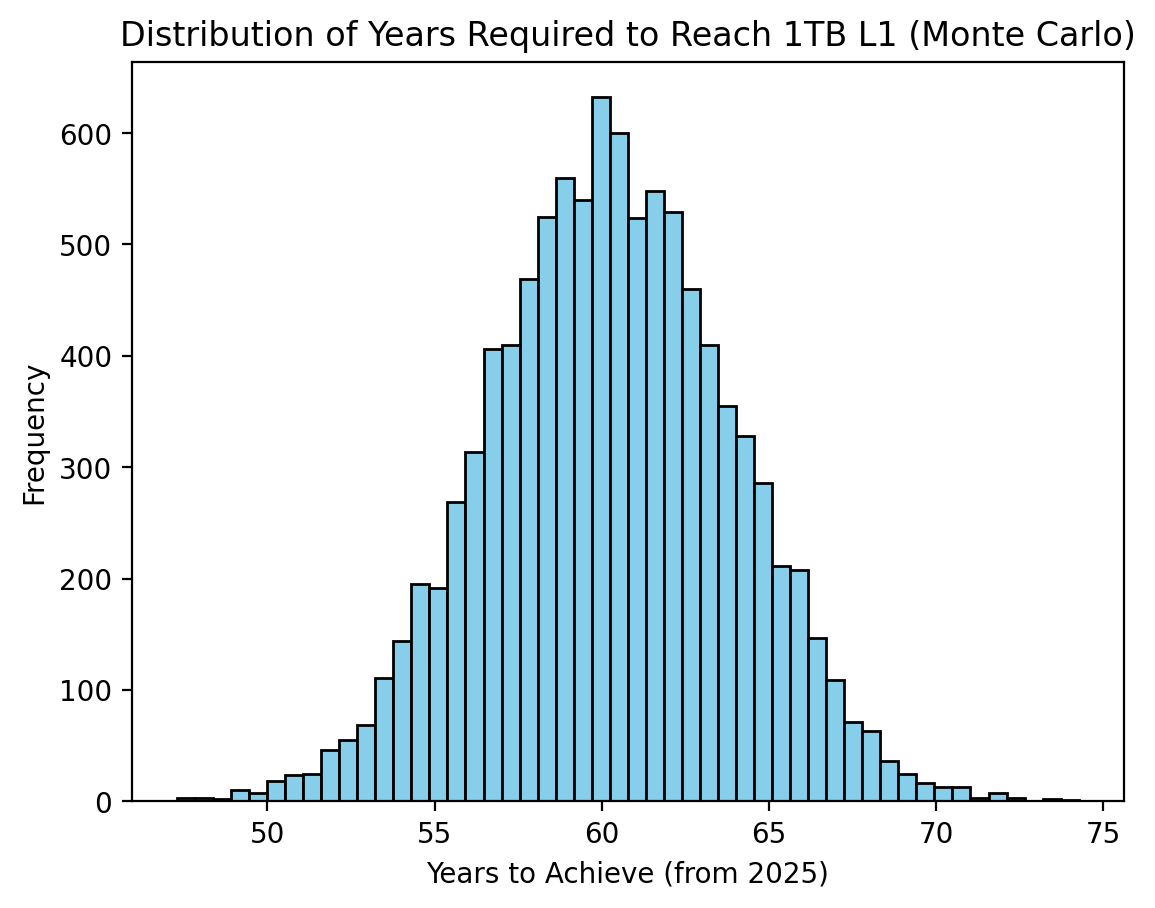

In [6]:
import numpy as np
import statistics
import matplotlib.pyplot as plt

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# --- Simulation Parameters ---
NUM_SIMULATIONS = 10_000
DOUBLINGS_REQUIRED = 24

# Mean and std dev for the doubling interval (in years):
MEAN_DOUBLING_TIME = 2.5
STD_DOUBLING_TIME = 0.75

# We'll clamp doubling times to [0.5, 10] years as a sanity check
MIN_DOUBLING = 0.5
MAX_DOUBLING = 10.0

# Optional: define a small probability of "breakthrough" or "stall"
# that modifies the doubling time distribution. We'll keep it off for now
BREAKTHROUGH_CHANCE = 0.0
STALL_CHANCE = 0.0

def random_doubling_time():
    """
    Returns a random doubling time drawn from a truncated normal distribution.
    Could incorporate special 'breakthrough' or 'stall' events.
    """
    while True:
        time = np.random.normal(MEAN_DOUBLING_TIME, STD_DOUBLING_TIME)
        # Clamp to a reasonable range
        if time > MIN_DOUBLING and time < MAX_DOUBLING:
            break

    # Optionally incorporate random breakthroughs or stalls
    # if np.random.rand() < BREAKTHROUGH_CHANCE:
    #     time *= 0.5  # Halve the time needed for a doubling
    # if np.random.rand() < STALL_CHANCE:
    #     time *= 2.0  # Double the time needed for a doubling

    return time

def simulate_one_run():
    """
    Sums random doubling intervals until we reach the required number of doublings.
    Returns the total time in years.
    """
    total_time = 0.0
    doublings_done = 0

    # Keep adding doubling intervals until we hit DOUBLINGS_REQUIRED
    while doublings_done < DOUBLINGS_REQUIRED:
        total_time += random_doubling_time()
        doublings_done += 1

    return total_time

# --- Monte Carlo Simulation ---
results = [simulate_one_run() for _ in range(NUM_SIMULATIONS)]

# Analyze results
mean_years = statistics.mean(results)
median_years = statistics.median(results)
min_years = min(results)
max_years = max(results)

# Let's imagine we start counting from 2025
start_year = 2025
mean_finish_year = start_year + mean_years
median_finish_year = start_year + median_years

# Print out some summary statistics
print(f"Simulation runs: {NUM_SIMULATIONS}")
print(f"Required Doublings to 1TB from 64KB: {DOUBLINGS_REQUIRED}")
print(f"Mean Years to Achieve: {mean_years:.1f}")
print(f"Median Years to Achieve: {median_years:.1f}")
print(f"Min/Max Years to Achieve: {min_years:.1f}/{max_years:.1f}")
print(f"Mean Finish Year (starting 2025): ~{mean_finish_year:.0f}")
print(f"Median Finish Year (starting 2025): ~{median_finish_year:.0f}")

# Plot the distribution
plt.hist(results, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Years Required to Reach 1TB L1 (Monte Carlo)")
plt.xlabel("Years to Achieve (from 2025)")
plt.ylabel("Frequency")
plt.show()


Below is a Lowess fitting curve applied to the data

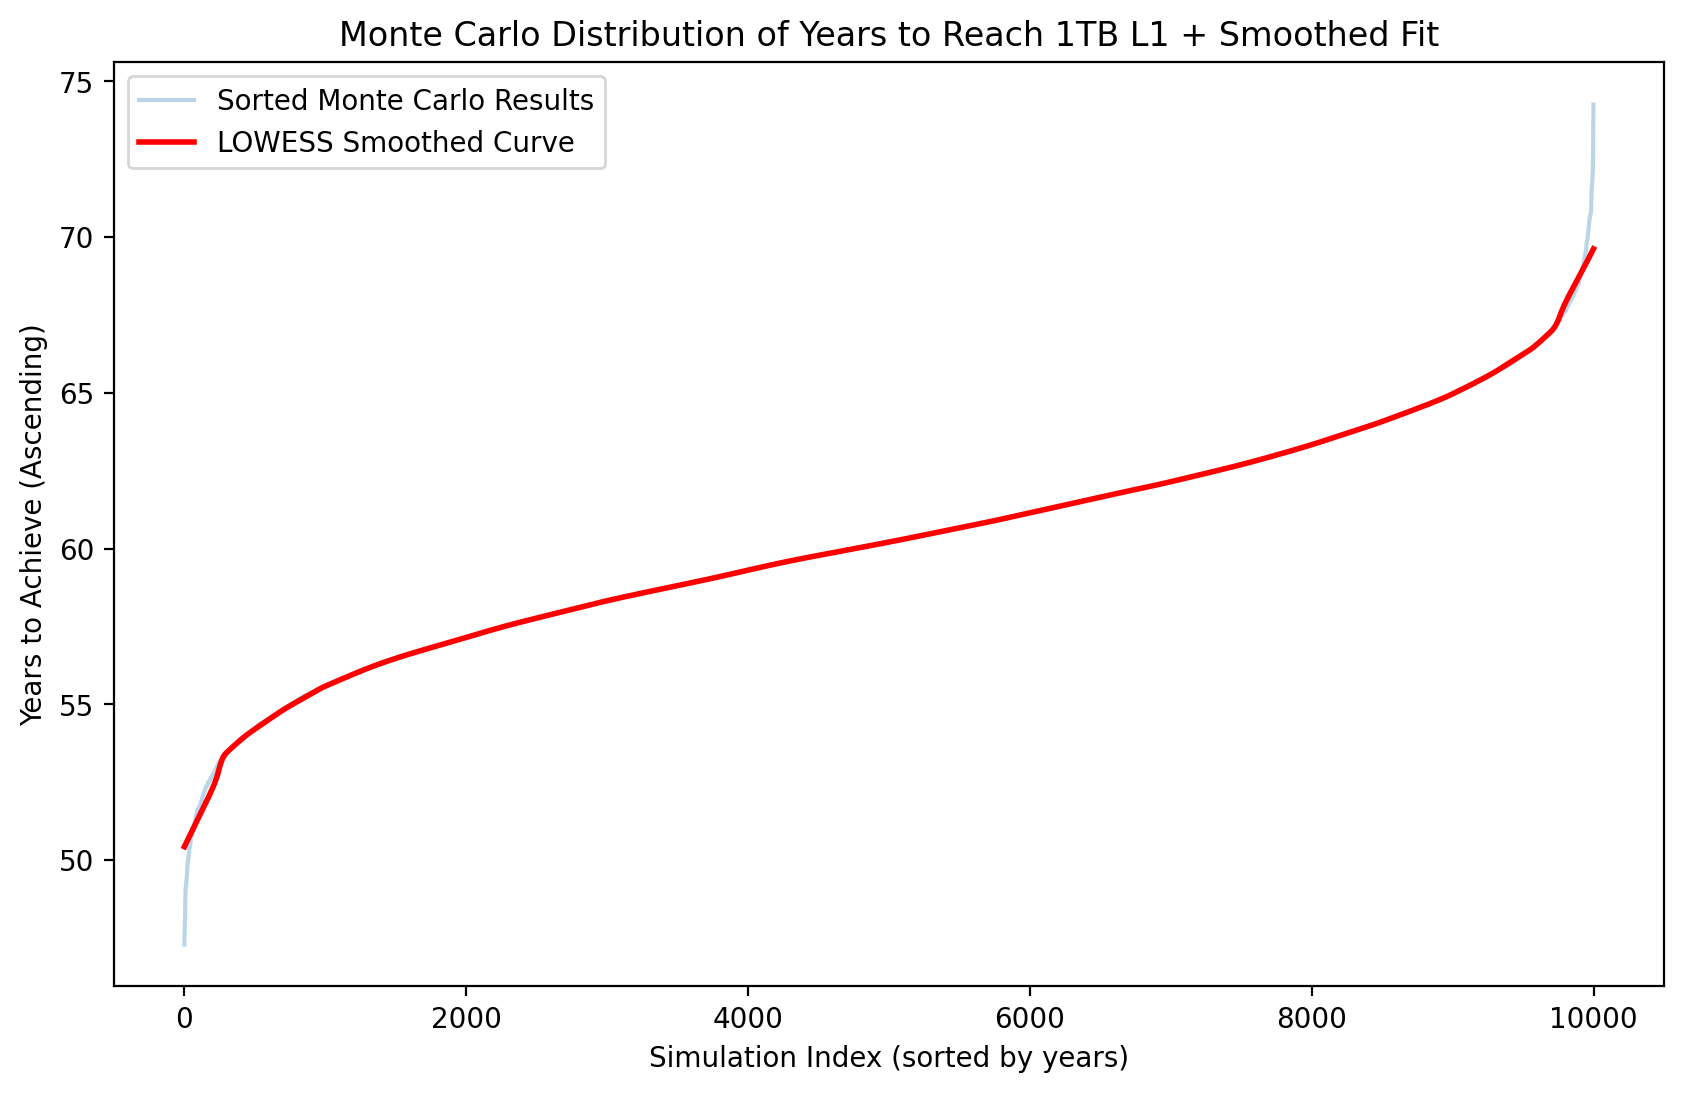

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Sort results in ascending order
sorted_results = np.sort(results)

# Create an x-axis from 0 to NUM_SIMULATIONS-1
x = np.arange(NUM_SIMULATIONS)

# Apply LOWESS for a smoothed regression-like curve
# frac determines the fraction of data used when estimating each y-value
# A smaller frac means less smoothing; larger frac means more smoothing.
smoothed = lowess(sorted_results, x, frac=0.05)

# smoothed is an array of shape (NUM_SIMULATIONS, 2) => [[x_i, y_i_smoothed], ...]
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

# Plot the original sorted data (thin line or scatter)
plt.figure(figsize=(10, 6))
plt.plot(x, sorted_results, label='Sorted Monte Carlo Results', alpha=0.3)

# Plot the smoothed LOWESS curve
plt.plot(x_smooth, y_smooth, color='red', linewidth=2.0, label='LOWESS Smoothed Curve')

plt.title("Monte Carlo Distribution of Years to Reach 1TB L1 + Smoothed Fit")
plt.xlabel("Simulation Index (sorted by years)")
plt.ylabel("Years to Achieve (Ascending)")
plt.legend()
plt.show()


Below is a moving average fitting curve applied to the data

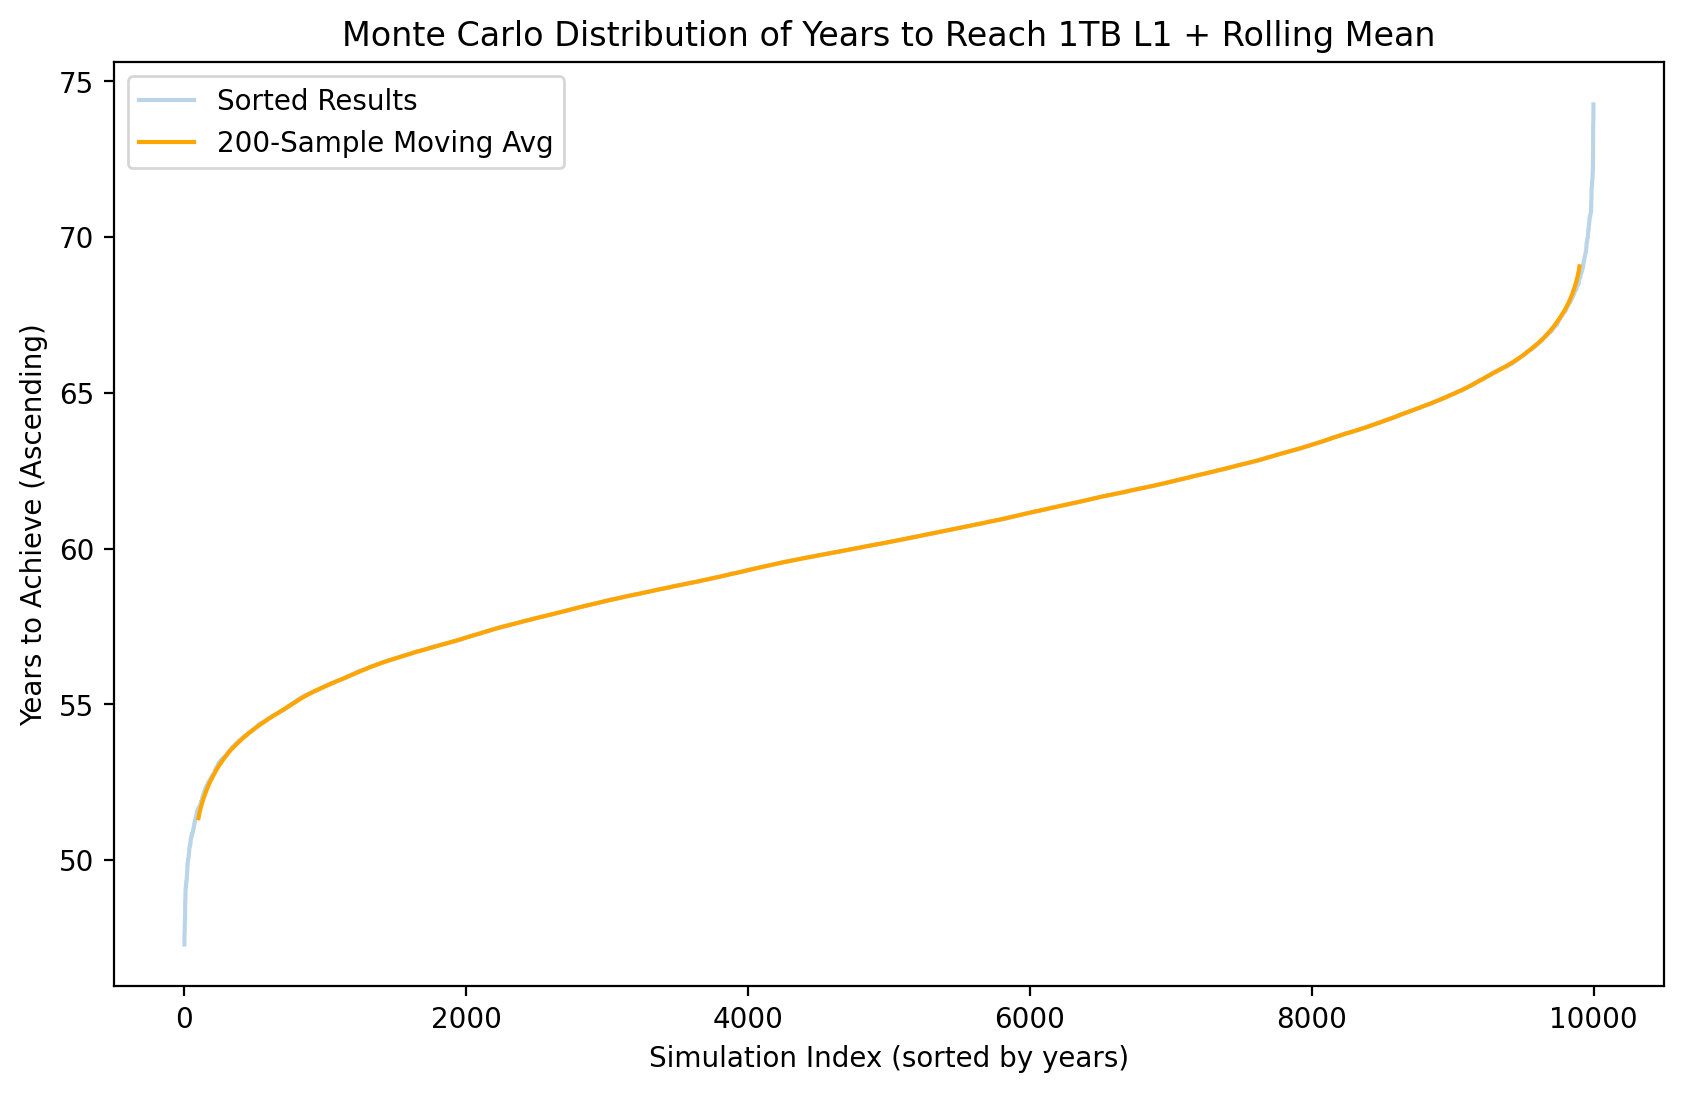

In [8]:
window_size = 200
rolling_means = np.convolve(sorted_results, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 6))
plt.plot(sorted_results, alpha=0.3, label='Sorted Results')
plt.plot(np.arange(window_size//2, window_size//2+len(rolling_means)),
         rolling_means,
         color='orange',
         label=f'{window_size}-Sample Moving Avg')

plt.title("Monte Carlo Distribution of Years to Reach 1TB L1 + Rolling Mean")
plt.xlabel("Simulation Index (sorted by years)")
plt.ylabel("Years to Achieve (Ascending)")
plt.legend()
plt.show()


Monte Carlo simulation of a trend towards achieving gigabyte level L1 cache memory.

Monte Carlo Runs: 10000
Doublings Required (64 KB -> 1 GB): 14
Mean Years to Achieve:   35.11
Median Years to Achieve: 35.11
Min/Max Years:           22.76 / 45.78


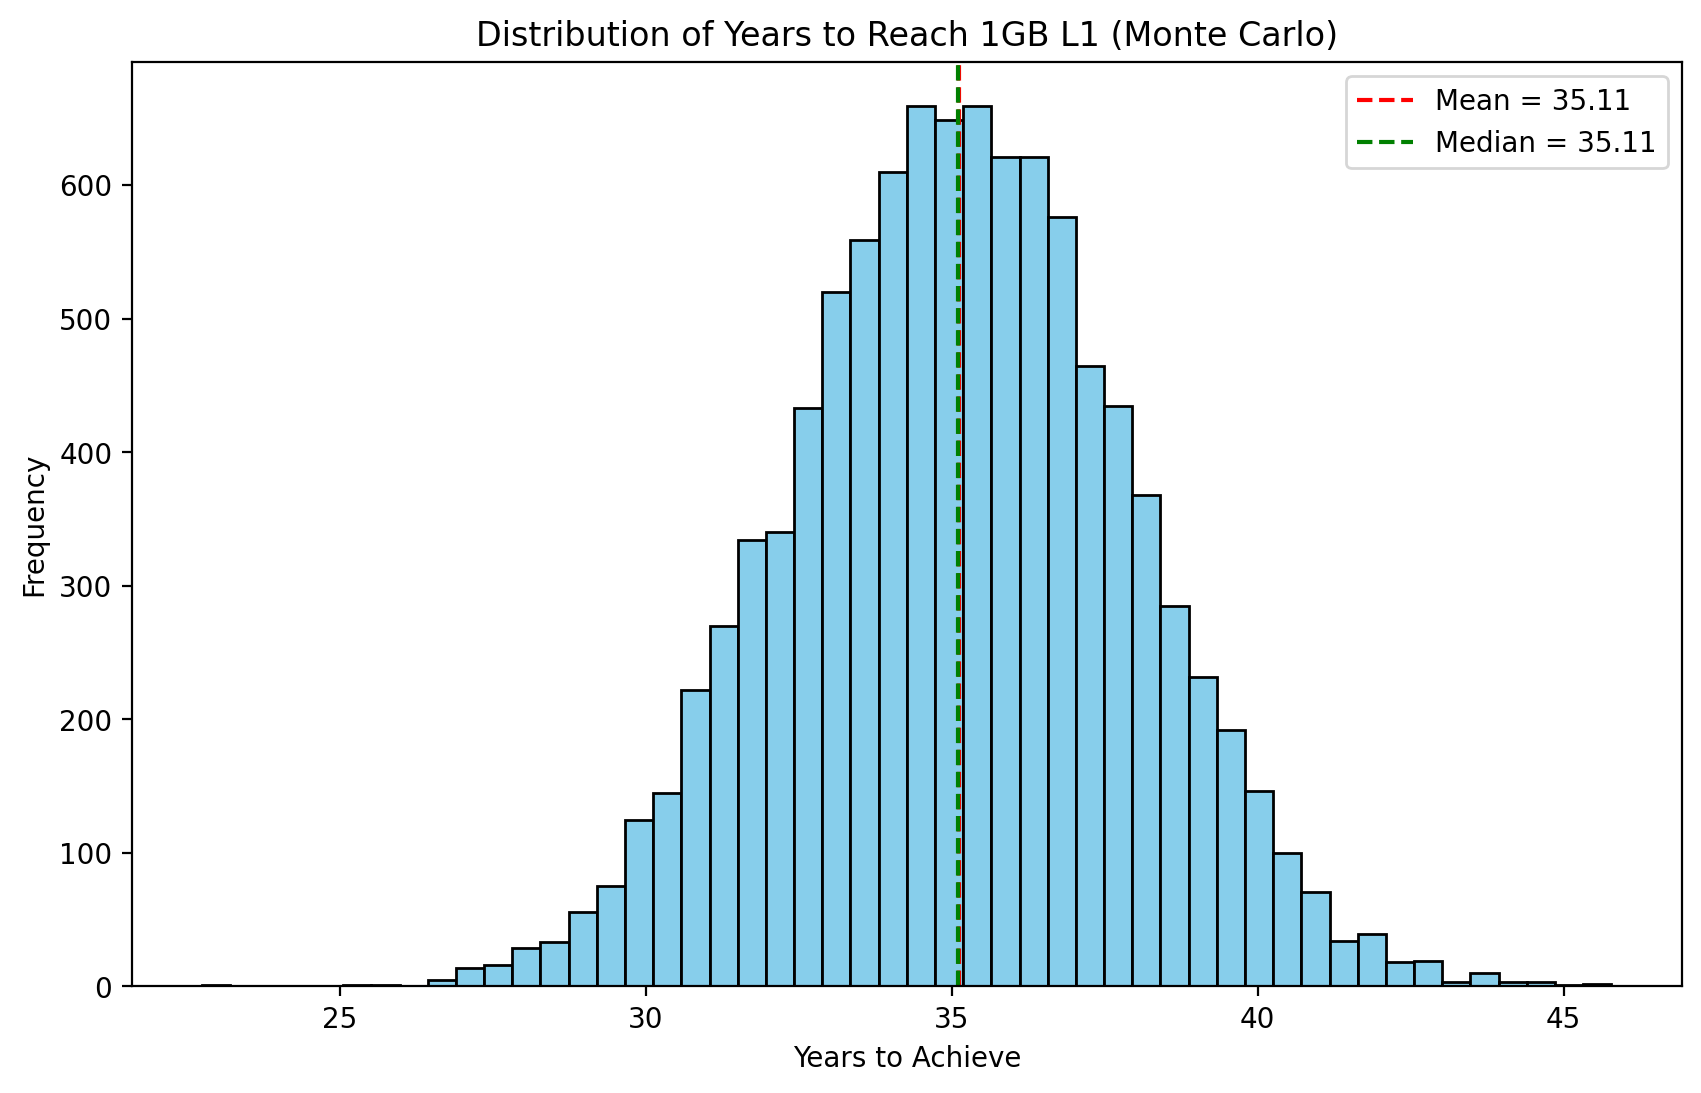

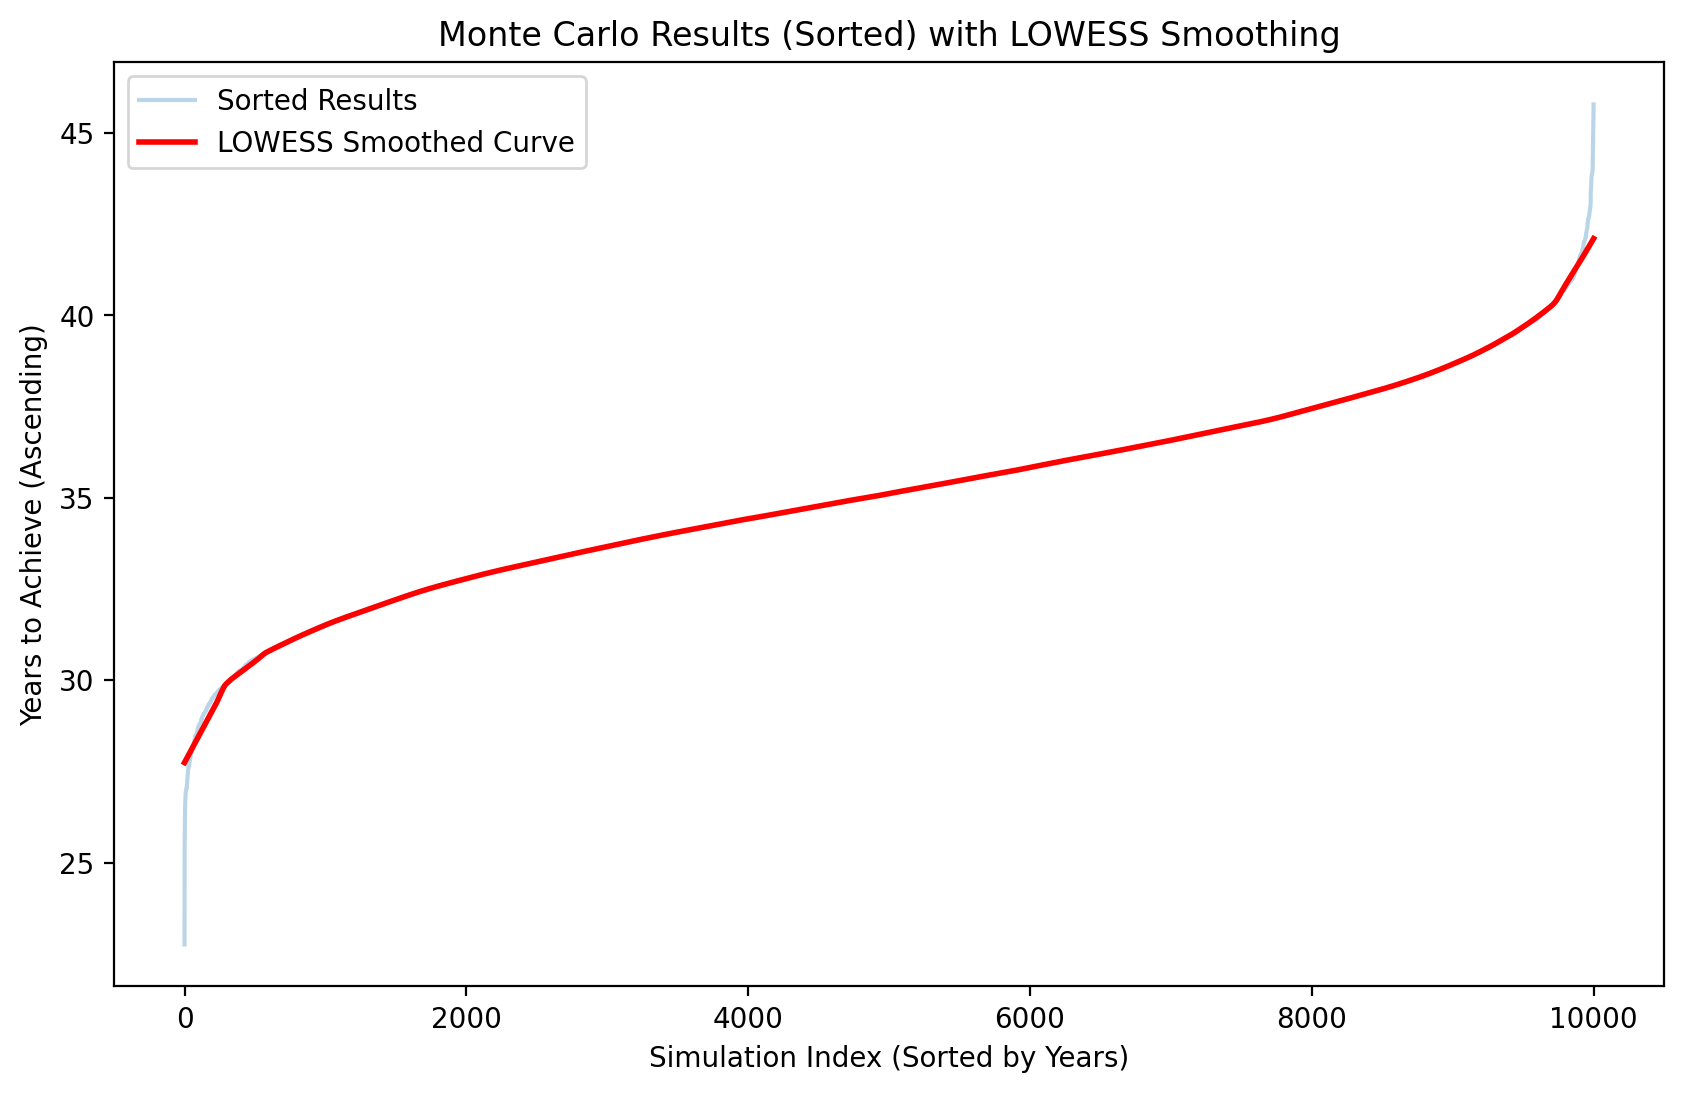

In [9]:
import numpy as np
import statistics
import matplotlib.pyplot as plt

# For LOWESS smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess

# --- Simulation Parameters ---
NUM_SIMULATIONS = 10_000           # Number of Monte Carlo runs
DOUBLINGS_REQUIRED = 14            # ~14 doublings to go from 64 KB to 1 GB
MEAN_DOUBLING_TIME = 2.5           # Mean years per density doubling
STD_DOUBLING_TIME = 0.75           # Std dev for years per doubling
MIN_DOUBLING = 0.5                 # Minimum clamped years per doubling
MAX_DOUBLING = 10.0                # Maximum clamped years per doubling

def random_doubling_time():
    """
    Returns a random doubling time drawn from a truncated normal distribution.
    Clamps to [MIN_DOUBLING, MAX_DOUBLING].
    """
    while True:
        time = np.random.normal(MEAN_DOUBLING_TIME, STD_DOUBLING_TIME)
        if MIN_DOUBLING < time < MAX_DOUBLING:
            return time

def simulate_one_run():
    """
    Accumulates random doubling intervals until we reach DOUBLINGS_REQUIRED.
    Returns the total years needed for that single simulation run.
    """
    total_time = 0.0
    doublings_done = 0
    while doublings_done < DOUBLINGS_REQUIRED:
        total_time += random_doubling_time()
        doublings_done += 1
    return total_time

# --- Monte Carlo Simulation ---
results = [simulate_one_run() for _ in range(NUM_SIMULATIONS)]

# Compute basic statistics
mean_years = statistics.mean(results)
median_years = statistics.median(results)
min_years = min(results)
max_years = max(results)

print(f"Monte Carlo Runs: {NUM_SIMULATIONS}")
print(f"Doublings Required (64 KB -> 1 GB): {DOUBLINGS_REQUIRED}")
print(f"Mean Years to Achieve:   {mean_years:.2f}")
print(f"Median Years to Achieve: {median_years:.2f}")
print(f"Min/Max Years:           {min_years:.2f} / {max_years:.2f}")

# --- Data Visualization ---

# 1) Histogram of the raw distribution
plt.figure(figsize=(10, 6))
plt.hist(results, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Years to Reach 1GB L1 (Monte Carlo)")
plt.xlabel("Years to Achieve")
plt.ylabel("Frequency")
plt.axvline(mean_years, color='red', linestyle='--', label=f"Mean = {mean_years:.2f}")
plt.axvline(median_years, color='green', linestyle='--', label=f"Median = {median_years:.2f}")
plt.legend()
plt.show()

# 2) LOWESS "Moving Average" Regression-Like Curve
# Sort results (ascending)
sorted_results = np.sort(results)
x = np.arange(NUM_SIMULATIONS)

# Apply LOWESS smoothing; 'frac' controls the smoothing window
smoothed = lowess(sorted_results, x, frac=0.05)
x_smooth = smoothed[:, 0]
y_smooth = smoothed[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(x, sorted_results, label='Sorted Results', alpha=0.3)
plt.plot(x_smooth, y_smooth, color='red', linewidth=2.0, label='LOWESS Smoothed Curve')
plt.title("Monte Carlo Results (Sorted) with LOWESS Smoothing")
plt.xlabel("Simulation Index (Sorted by Years)")
plt.ylabel("Years to Achieve (Ascending)")
plt.legend()
plt.show()
